## This notebook shows some analysis on Report Data - 1.xlsx data
Jul 2020 by Rafal Rakowski

In [1]:
# Prepare compute environment
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
# With excel_API read-in the Report Data - 1.xlsx into Python Pandas
Report_Data_file = pd.ExcelFile('Report Data - 1.xlsx')
data_frame = Report_Data_file .parse('Data')

In [5]:
# Show read-in to iPython excel file
data_frame

,Site Name,Title,Site Auction ID,SKU,Billing Date,Classification,Order ID,Invoice ID,Currency,Ship to City,...,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106
0,Amazon Seller Central - DE,NaN,121019244,WOKERE01BLK,2020-05-01,NaN,302-2957874-7719522,18246629,GBP,Elmshorn,...,14 Day Conversion Rate,14 Day New-to-brand Orders (#),14 Day % of Orders New-to-brand,14 Day New-to-brand Sales (£),14 Day % of Sales New-to-brand,14 Day New-to-brand Units (#),14 Day % of Units New-to-brand,14 Day New-to-brand Order Rate,NaN,NaN
1,Amazon Seller Central - DE,NaN,121019316,WOKERE01BLK,2020-05-01,NaN,028-8076565-1876310,18246700,GBP,Eberswalde,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amazon Seller Central - DE,NaN,121019421,HMTROL01GY,2020-05-01,NaN,303-4633249-5712360,18246797,GBP,erkelenz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amazon Seller Central - DE,"BENTLEY 2,6 METER TELESKOPLEITER- AUSZIEHBAR- ...",121018793,LAD08,2020-05-01,Medium,306-9475455-1980339,18246345,GBP,Wald im Pinzgau 21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amazon Seller Central - DE,Bentley Garden - Abdeckplane/Schutzhülle für 2...,121019218,BENCHCOVER2,2020-05-01,XSmall,305-1962523-6370751,18246609,GBP,karlsfeld,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24961,ManoMano UK,Charles Bentley Universal Waterproof Gas Charc...,BBQCOVER3,BBQCOVER3,2020-05-31,XSmall,M200520109756,18270273,GBP,Treeton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24962,ManoMano UK,Charles Bentley Universal Waterproof Gas Charc...,BBQCOVER3,BBQCOVER3,2020-05-31,XSmall,M200520118060,18270526,GBP,Haywards Heath,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24963,ManoMano UK,Charles Bentley Zanzibar 2 Seater Outdoor Gard...,GLZANBENCHGY,GLZANBENCHGY,2020-05-31,MediumL,M200520109975,18270323,GBP,Bearsden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24964,ManoMano UK,Charles Bentley Zanzibar 2 Seater Outdoor Gard...,GLZANBENCHGY,GLZANBENCHGY,2020-05-31,MediumL,M200520118182,18270527,GBP,Leicester,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Pick some 'Price' data
data_frame['Unit Price'].dropna(inplace=True)
bool_series_1 = pd.isnull(data_frame['Unit Price'])  
print('Number of records in [Price Unit] column:')  
print(len(bool_series_1))
boolean=any(bool_series_1)
if boolean == False:
   print('There is no missing values in the [Price Unit] column')


Number of records in [Price Unit] column:
24966
There is no missing values in the [Price Unit] column


In [6]:
# Pick 'Ship to Country' data to relate to
data_frame['Ship to Country'].dropna(inplace=True)
bool_series_2 = pd.isnull(data_frame['Ship to Country'])  
print('Number of records in [Ship to Country] column:')  
print(len(bool_series_2))
boolean=any(bool_series_2)
if boolean == False:
   print('There is no missing values in the [Ship to Country] column')

Number of records in [Ship to Country] column:
24927
There is no missing values in the [Ship to Country] column


In [7]:
# Pick 'Ship to City' data 
data_frame['Ship to City'].dropna(inplace=True)
bool_series_3 = pd.isnull(data_frame['Ship to City'])  
print('Number of records in [Ship to City] column:')  
print(len(bool_series_3))
boolean=any(bool_series_3)
if boolean == False:
   print('There is no missing values in the [Ship to City] column')

Number of records in [Ship to City] column:
24927
There is no missing values in the [Ship to City] column


In [8]:
# Pick 'Market Place' data 
data_frame['Market Place'].dropna(inplace=True)
bool_series_4 = pd.isnull(data_frame['Market Place'])  
#data_frame[bool_series] = 'emptycell'
print('Number of records in [Market Place] column:')  
print(len(bool_series_4))
boolean=any(bool_series_4)
if boolean == False:
   print('There is no missing values in the [Market Place] column')

Number of records in [Market Place] column:
24966
There is no missing values in the [Market Place] column


In [9]:
# Print some basic statistics for Prices groupby Country 
cleansed_frame = pd.DataFrame(columns=['Unit Price', 'Ship to Country'])
cleansed_frame['Unit Price'] = data_frame['Unit Price']
cleansed_frame['Ship to Country'] = data_frame['Ship to Country']
price_country_data = cleansed_frame.groupby('Ship to Country')
price_country_data.describe()

Unit Price                                                  \
                     count        mean         std    min      25%     50%   
Ship to Country                                                              
Austria               22.0   40.971818   15.496686  16.99  26.7400  42.940   
Belgium               58.0  107.866034  166.150987  12.89  44.9900  59.990   
Denmark               52.0   83.051731   71.192160   7.06  40.0000  59.990   
France              1614.0   86.809634  103.347455   6.99  44.9900  60.995   
Germany              364.0   78.873846   77.657928  11.99  43.0000  59.990   
Guernsey              17.0   54.010588   66.282371   7.49  24.9900  33.320   
Ireland              382.0   80.111152   87.825756   9.49  37.2475  49.990   
Isle of Man            2.0   24.990000   14.142136  14.99  19.9900  24.990   
Italy                382.0   74.079607   58.370965  10.00  40.0500  61.000   
Jersey                10.0   24.491000   11.826441   9.99  14.7850  23.740   
Luxembourg             2.0   71.490000   33.234019  47.99  59.7400  71.490   
Monaco                 2.0   79.990000   28.284271  59.99  69.9900  79.990   
Netherlands           33.0   58.236970   49.940273  26.99  40.0000  40.000   
Poland                 3.0   54.990000    8.660254  49.99  49.9900  49.990   
Slovak Republic        1.0   59.990000         NaN  59.99  59.9900  59.990   
Spain                286.0   90.600035   81.092751   9.99  50.0000  67.000   
Sweden                72.0   88.770972   88.841995  16.99  49.9900  59.990   
United Kingdom     21625.0   57.040629   73.984788   0.99  17.9900  39.990   

                                    
                      75%      max  
Ship to Country                     
Austria           49.9900    69.99  
Belgium          104.4900  1099.99  
Denmark           89.9900   299.99  
France            93.7425  1490.90  
Germany           99.9900  1099.99  
Guernsey          66.6600   291.66  
Ireland           89.9900  1099.99  
Isle of Man       29.9900    34.99  
Italy             76.4900   530.00  
Jersey            32.2800    41.66  
Luxembourg        83.2400    94.99  
Monaco            89.9900    99.99  
Netherlands       59.9900   299.99  
Poland            57.4900    64.99  
Slovak Republic   59.9900    59.99  
Spain             90.0000   420.00  
Sweden            89.9900   700.00  
United Kingdom    59.9900  1099.99

In [10]:
# Sum-up sales per country
price_country_data.agg('sum')

,Unit Price
Ship to Country,
Austria,901.38
Belgium,6256.23
Denmark,4318.69
France,140110.75
Germany,28710.08
Guernsey,918.18
Ireland,30602.46
Isle of Man,49.98
Italy,28298.41


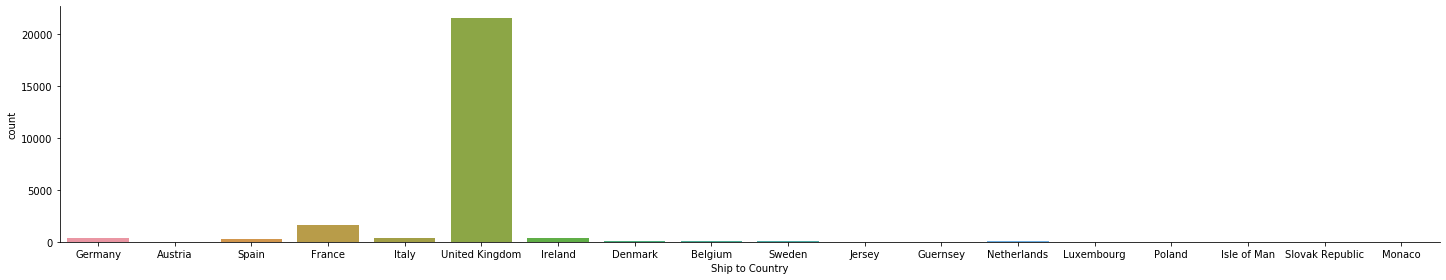

In [54]:
# Draw histogram of total item sold group by Country
g = sns.catplot('Ship to Country',data=data_frame, kind="count", height=4, aspect=5) #,hue='Market Place'

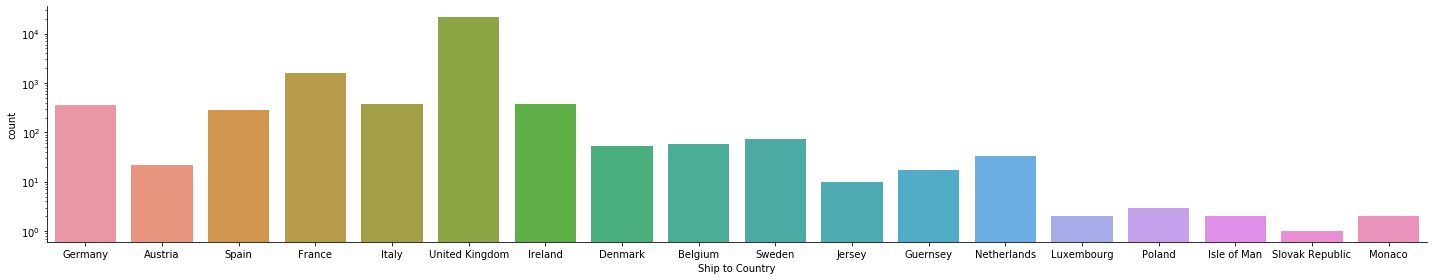

In [56]:
# Same as above but in logarythmic sale
g = sns.catplot('Ship to Country',data=data_frame, kind="count", height=4, aspect=5) #,hue='Ship to City'
g.set(yscale="log") 

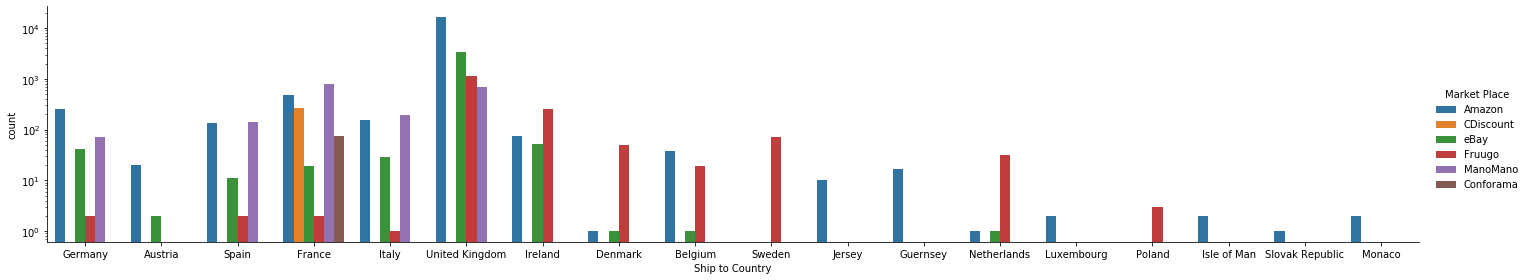

In [55]:
# Same as above plus split on market places

g = sns.catplot('Ship to Country',data=data_frame, hue='Market Place', kind="count", height=4, aspect=5) 
g.set(yscale="log") 

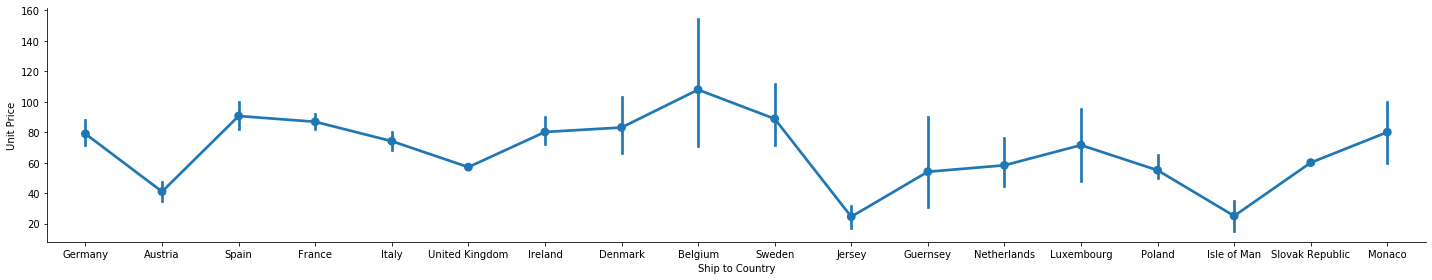

In [93]:
# Mean Sales by Country with standard deviation as bars
sns.factorplot(x='Ship to Country',y='Unit Price',data=data_frame,kind="point", height=4, aspect=5)

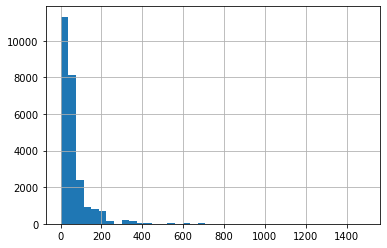

In [99]:
# Histogram of all cumulated Sale Priccs (how many items sold per unit price)
cleansed_frame['Unit Price'].hist(bins=40)

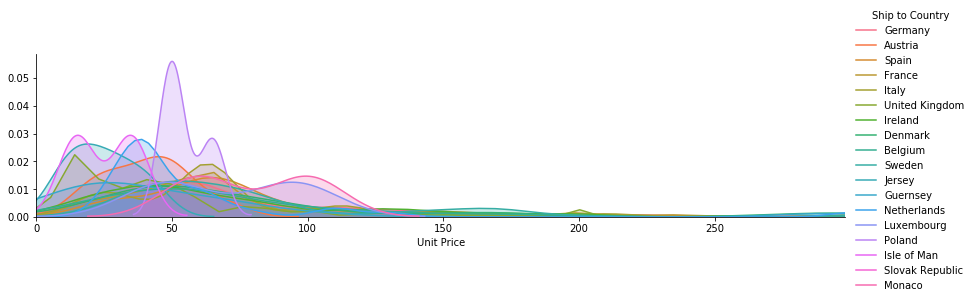

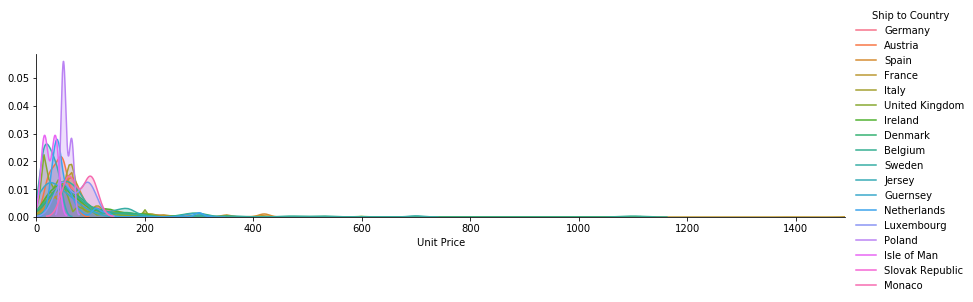

In [104]:
# Same as above but more precisely shown with a density of Price per Country

#Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(cleansed_frame, hue="Ship to Country",aspect=4)
fig.map(sns.kdeplot,'Unit Price',shade= True)
# Adjust  figure
highest_price = cleansed_frame['Unit Price'].max()
fig.set(xlim=(0,highest_price/5))
fig.add_legend()

# We could have done the same thing for the entire price range:
fig = sns.FacetGrid(cleansed_frame, hue="Ship to Country",aspect=4)
fig.map(sns.kdeplot,'Unit Price',shade= True)
# Adjust  figure
highest_price = cleansed_frame['Unit Price'].max()
fig.set(xlim=(0,highest_price/5))
fig.add_legend()